<a href="https://colab.research.google.com/github/Brilliyandddd/PCVK/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kelompok 2
- Agung Afrizal Daffa (2141720110)
- Brilliyand Noval Herdana Putra (2141720104)
- Muhammad Islahuddin (2141720268)

## Prepare

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import cv2
from google.colab.patches import cv2_imshow

## Nomor 2

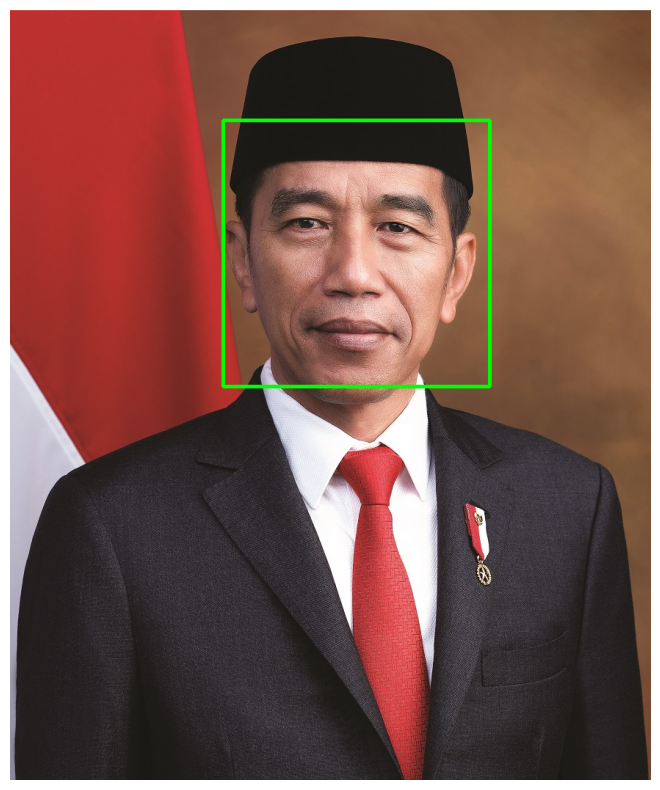

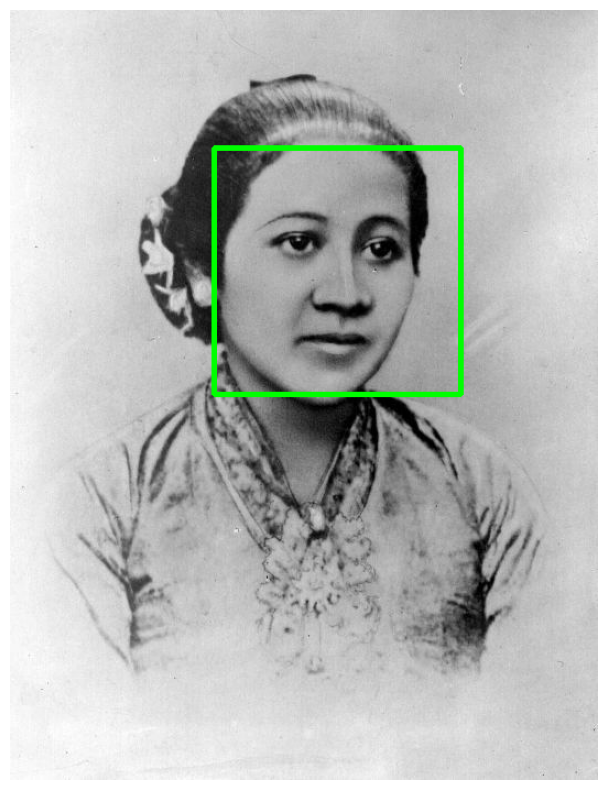

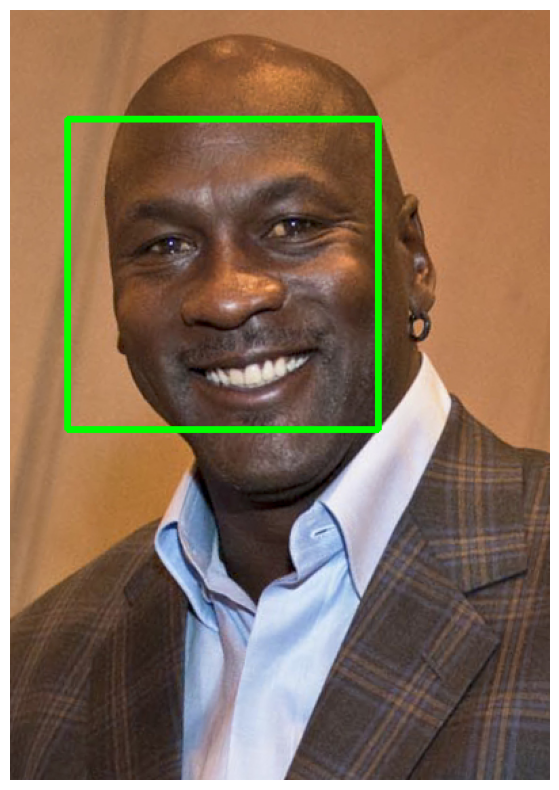

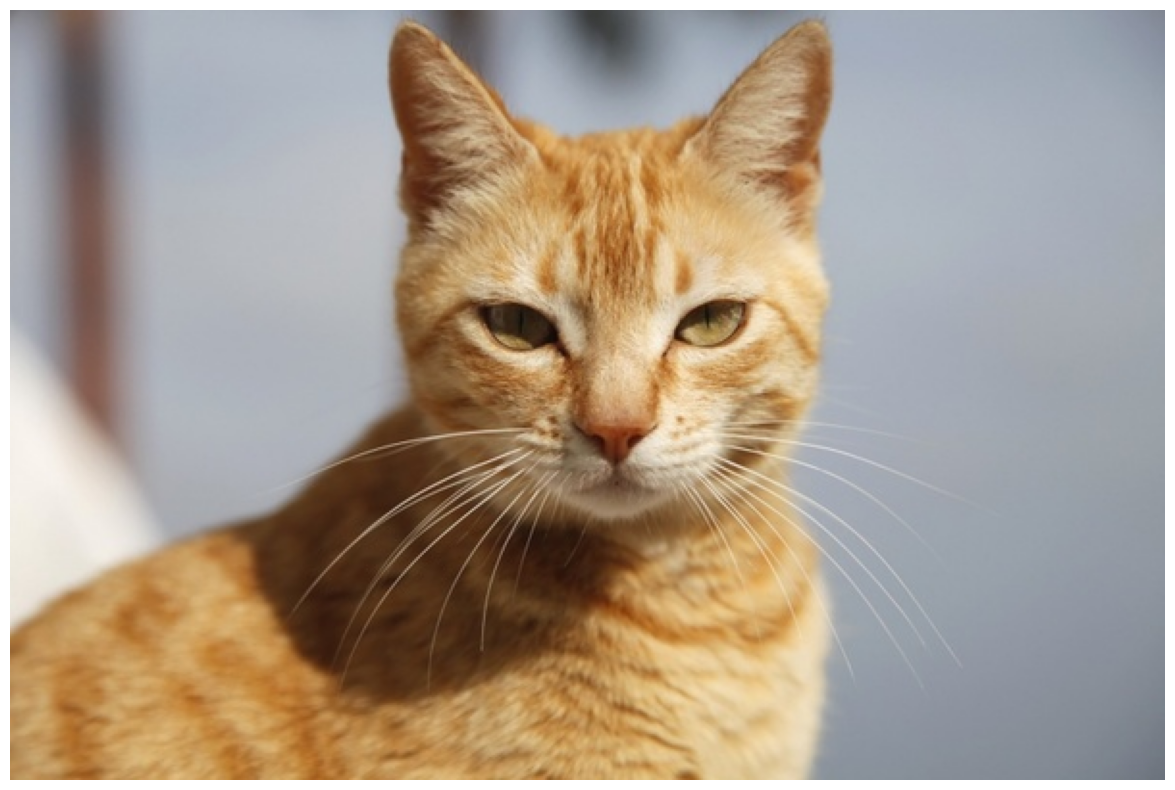

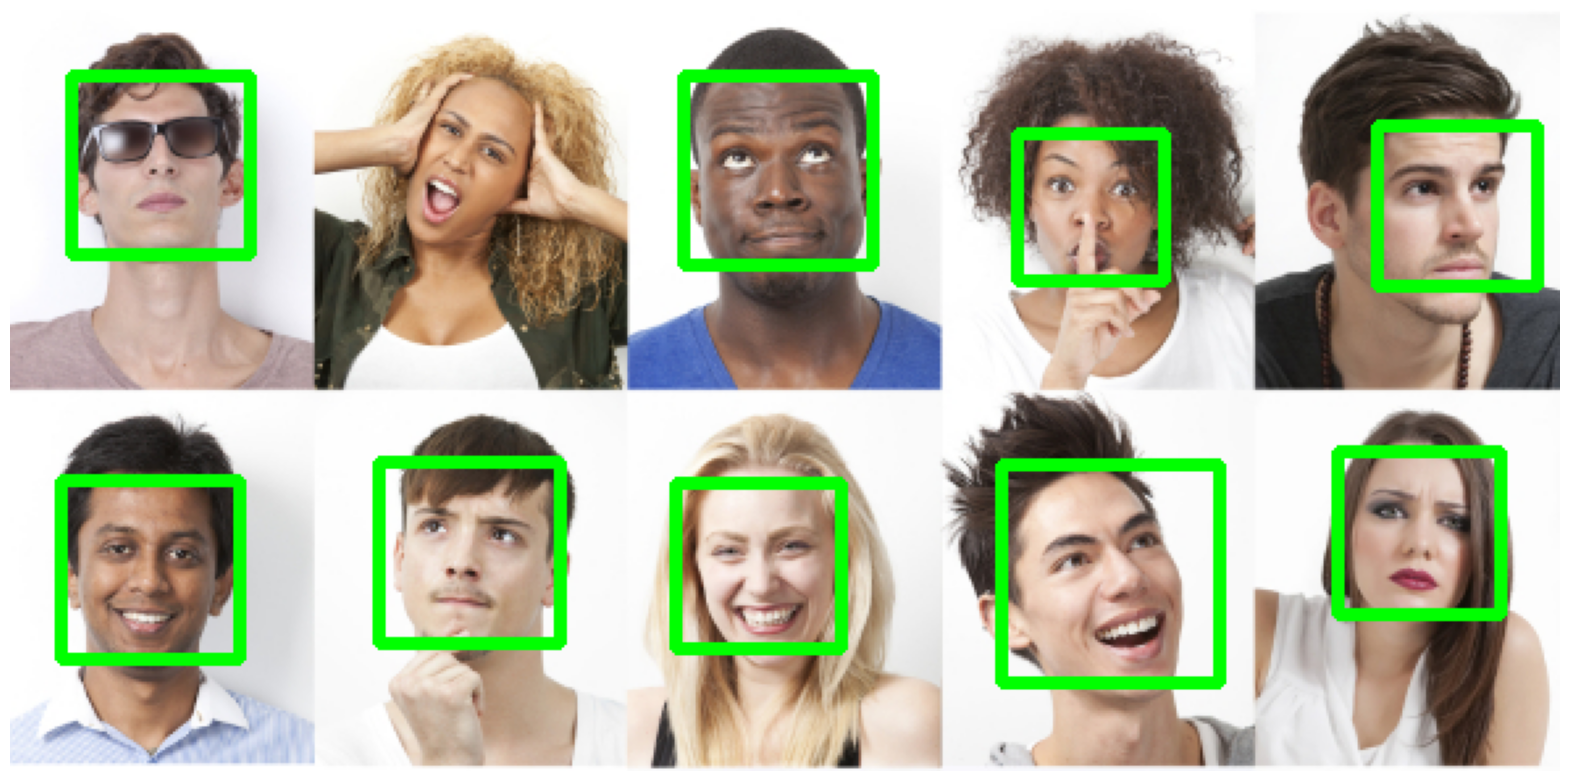

In [55]:
import cv2
import matplotlib.pyplot as plt

imagePath = [
    '/content/drive/MyDrive/PCVK/Week12/facedet/jokowi.jpg',
    '/content/drive/MyDrive/PCVK/Week12/facedet/kartini.jpg',
    '/content/drive/MyDrive/PCVK/Week12/facedet/mjordan.jpg',
    '/content/drive/MyDrive/PCVK/Week12/facedet/mycat.jpg',
    '/content/drive/MyDrive/PCVK/Week12/facedet/people.jpg'
]

for path in imagePath:
    img = cv2.imread(path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_classifier = cv2.CascadeClassifier("/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_frontalface_alt.xml")

    faces = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20,10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

## Nomor 3

(-0.5, 599.5, 399.5, -0.5)

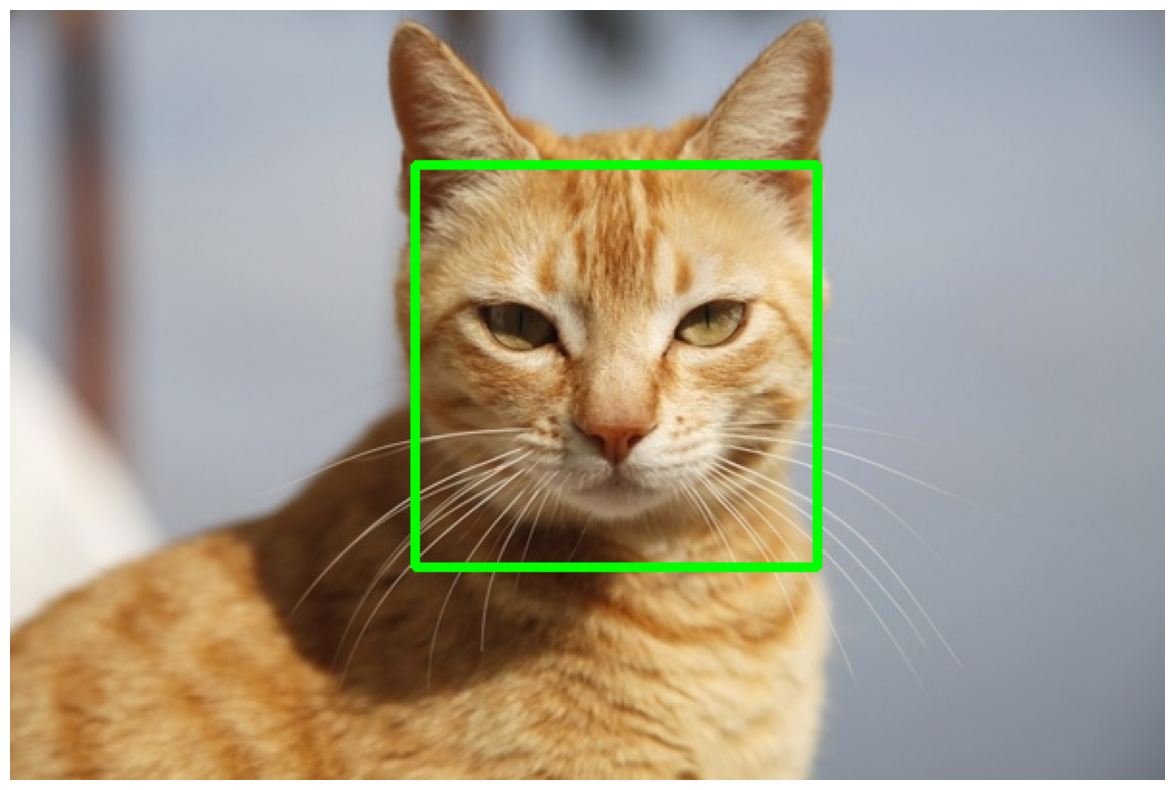

In [56]:
import cv2
import matplotlib.pyplot as plt

imagePath = '/content/drive/MyDrive/PCVK/Week12/facedet/mycat.jpg'

img = cv2.imread(imagePath)

img.shape

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_image.shape

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "/content/drive/MyDrive/PCVK/Week12/haarcascade_frontalcatface.xml"
)

face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/haarcascade_frontalcatface.xml')

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

## Nomor 4

(-0.5, 872.5, 1049.5, -0.5)

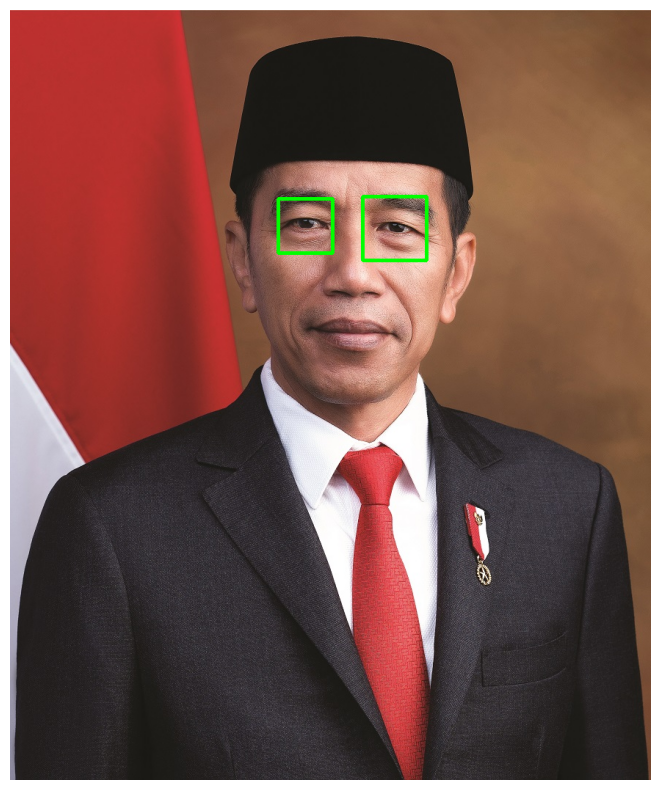

In [57]:
import cv2
import matplotlib.pyplot as plt

imagePath = '/content/drive/MyDrive/PCVK/Week12/facedet/jokowi.jpg'

img = cv2.imread(imagePath)

img.shape

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_image.shape

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_eye.xml"
)

face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_eye.xml')

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

## Nomor 5

<IPython.core.display.Javascript object>

(480, 640)
Saved to zalna.jpg


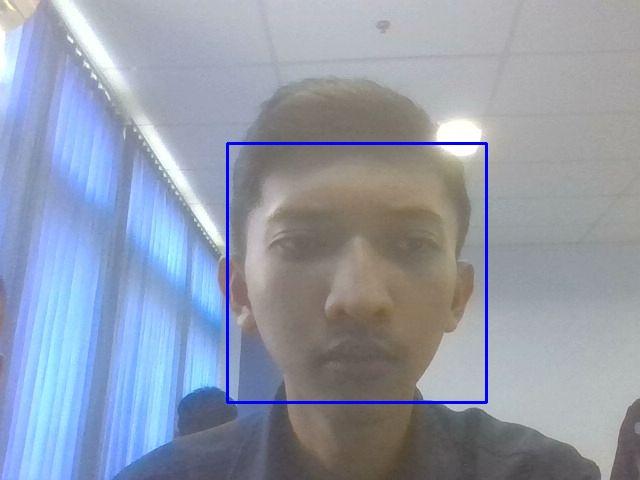

<IPython.core.display.Javascript object>

In [58]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time
import cv2 as cv
import numpy as np

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_frontalface_alt.xml')
def take_photo(filename='brill.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('brill.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

## Nomor 6

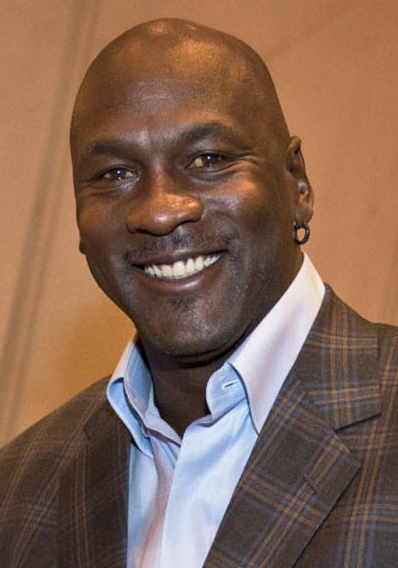

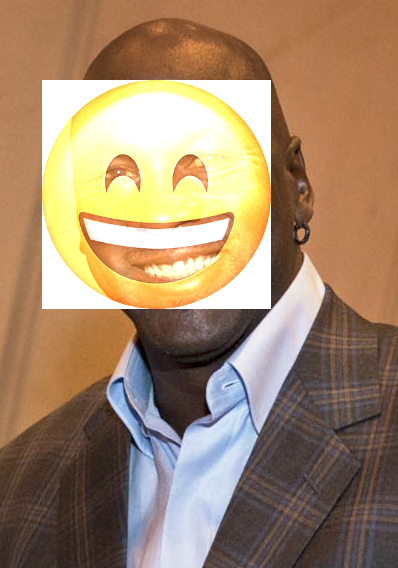

In [59]:
import cv2
from google.colab.patches import cv2_imshow

# Load the face detection classifier
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_frontalface_alt.xml')

# Load the images
mjordan = cv2.imread('/content/drive/MyDrive/PCVK/Week12/Face Detection/mjordan.jpg')
smile = cv2.imread('/content/drive/MyDrive/PCVK/Week12/Face Detection/smile.png', -1)

# Convert mjordan to grayscale for face detection
mjordan_gray = cv2.cvtColor(mjordan, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(mjordan_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Create a copy of the original image to display
original_mjordan = mjordan.copy()

# Overlay smile on the first detected face (assumes only one face)
if len(faces) > 0:
    x, y, w, h = faces[0]
    # Resize smile image to match the size of the detected face
    smile_resized = cv2.resize(smile, (w, h))
    # Get the region of interest (ROI) in mjordan
    roi = mjordan[y:y+h, x:x+w]
    # Apply the overlay to the ROI
    mjordan[y:y+h, x:x+w] = cv2.addWeighted(roi, 1, smile_resized, 1, 0)

# Display the original image
cv2_imshow(original_mjordan)

# Display the resulting image with smile added
cv2_imshow(mjordan)


## Nomor 7

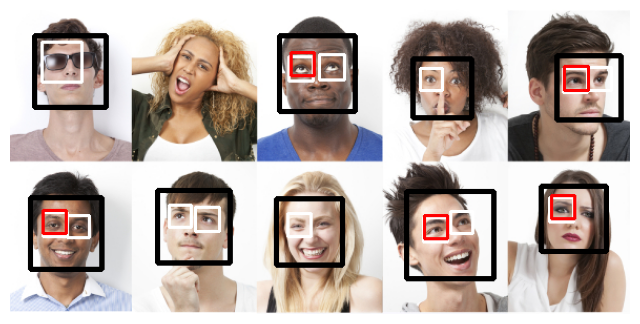

In [60]:
import cv2
import matplotlib.pyplot as plt

# Path gambar yang ingin dideteksi
imagePath = '/content/drive/MyDrive/PCVK/Week12/Face Detection/people.jpg'

# Membaca gambar menggunakan OpenCV
img = cv2.imread(imagePath)

# Konversi ke citra keabuan (grayscale)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Inisialisasi detektor wajah
face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_frontalface_alt.xml')

# Mendeteksi wajah
faces = face_classifier.detectMultiScale(gray_image)

# Menggambar bounding box hitam di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 0), 3)

# Inisialisasi detektor mata
left_eye_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_eye.xml')
right_eye_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/Face Detection/haarcascade_righteye_2splits.xml')

# Untuk setiap wajah yang terdeteksi
for (x, y, w, h) in faces:
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Mendeteksi mata dalam setiap wajah yang terdeteksi
    left_eyes = left_eye_classifier.detectMultiScale(roi_gray)
    right_eyes = right_eye_classifier.detectMultiScale(roi_gray)

    # Menggambar bounding box putih di sekitar mata kiri
    for (ex, ey, ew, eh) in left_eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 2)

    # Menggambar bounding box merah di sekitar mata kanan
    for (ex, ey, ew, eh) in right_eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)

# Konversi gambar ke format RGB sebelum menampilkannya menggunakan Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Menampilkan gambar yang telah dideteksi wajah dan mata
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()